In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Breast_cancer_data.csv')

In [3]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [5]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [8]:
df.dtypes

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


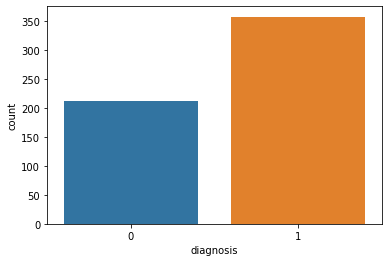

In [6]:
sns.countplot(df['diagnosis'])

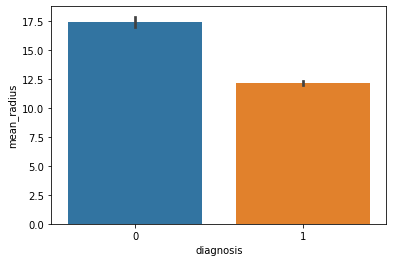

In [18]:
sns.barplot(x = df['diagnosis'], y = df['mean_radius'], data = df)


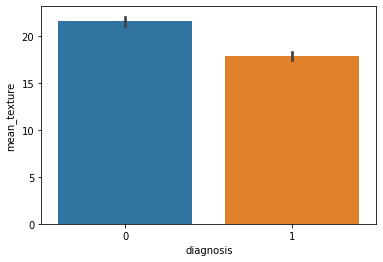

In [19]:
sns.barplot(x = df['diagnosis'], y = df['mean_texture'], data =df)

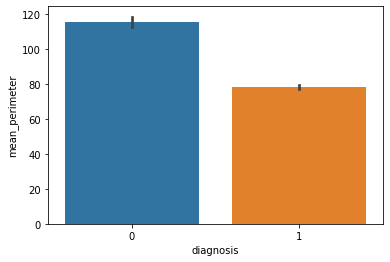

In [20]:
sns.barplot(x = df['diagnosis'], y = df['mean_perimeter'], data =df)

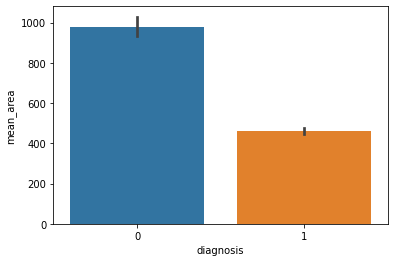

In [23]:
sns.barplot(x = df['diagnosis'],y = df['mean_area'], data = df)

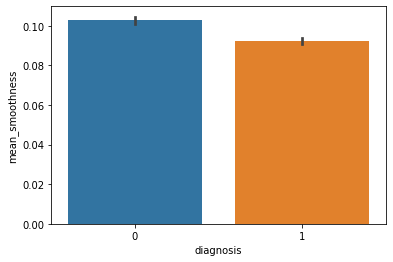

In [24]:
sns.barplot(x = df['diagnosis'],y = df['mean_smoothness'], data=df)

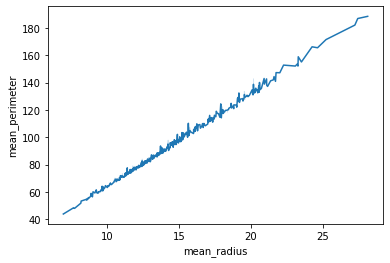

In [25]:

sns.lineplot (x = df['mean_radius'],y = df['mean_perimeter'],data = df)

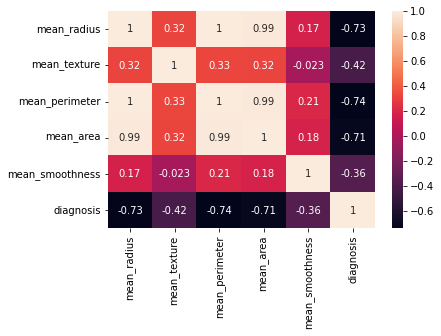

In [27]:
corr = df.corr()
sns.heatmap(corr, annot = True)

As you can see above, we obtain the heatmap of correlation among the variables. The color palette in the side represents the amount of correlation among the variables. The lighter shade represents a high correlation.

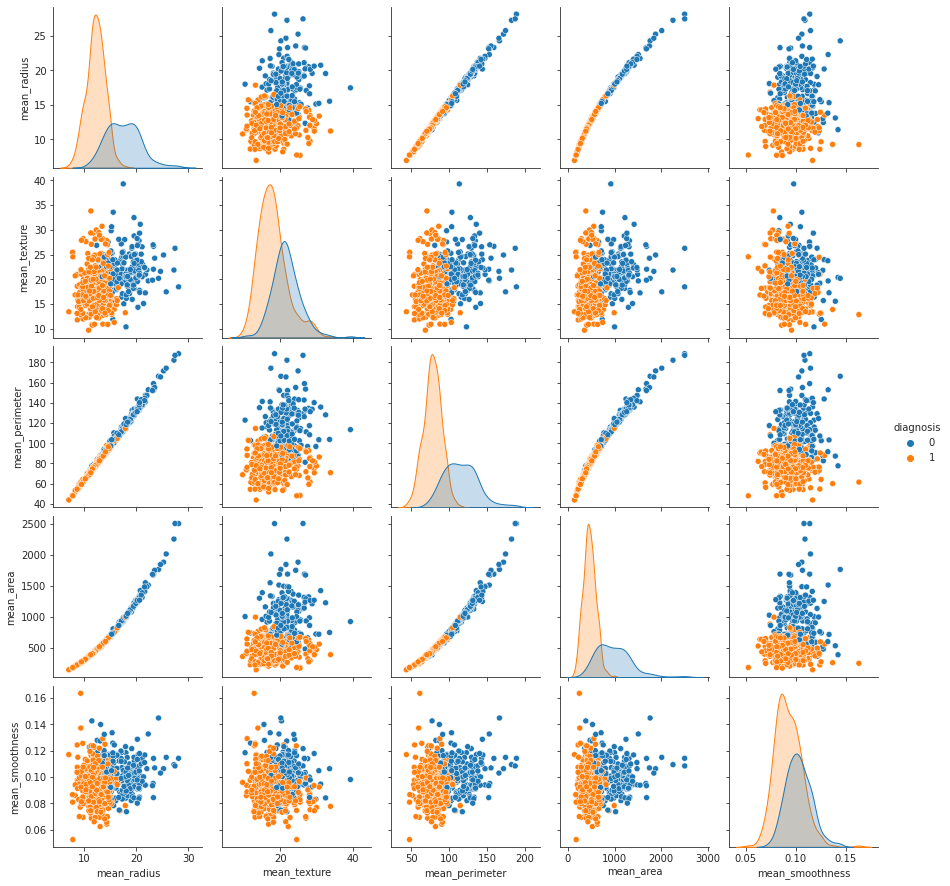

In [31]:
sns.set_style("ticks")
sns.pairplot(df,hue="diagnosis");
plt.show()

ML MODELS

In [38]:
from sklearn.model_selection import train_test_split
Y = df['diagnosis']
X = df.drop(columns=['diagnosis'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [39]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (455, 5)
Y train shape:  (455,)
X test shape:  (114, 5)
Y test shape:  (114,)


Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit( X_train, Y_train)
logregScore = logreg.score( X_test, Y_test)
print('Accuracy Score on Logistic Regression:', logregScore)

Accuracy Score on Logistic Regression: 0.9298245614035088


In [43]:
LogregPredict = logreg.predict(X_test)

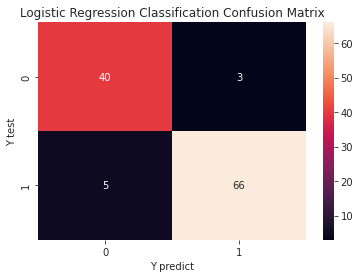

In [45]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
logreg_cm = confusion_matrix(Y_test,LogregPredict)
sns.heatmap(logreg_cm, annot = True)
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

Decision Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 10)
dtc.fit(X_train, Y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [50]:
DecisionTreeClassifierScore = dtc.score(X_test, Y_test)
print("Accuracy on Decision Treee Classifier Model:", DecisionTreeClassifierScore)

Accuracy on Decision Treee Classifier Model: 0.9035087719298246


In [51]:
DtcPredict = dtc.predict(X_test)

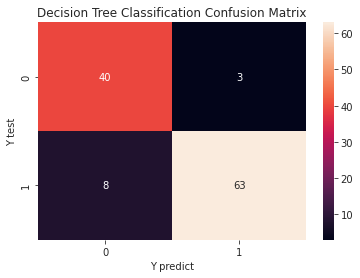

In [52]:
#The Confusion Matrix
dtc_cm = confusion_matrix(Y_test, DtcPredict)
sns.heatmap(dtc_cm, annot = True)
plt.title('Decision Tree Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [54]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, random_state = 9)
rfc.fit(X_train, Y_train)
RandomForestScore = rfc.score(X_test, Y_test)
print("Accuracy Score on Random Forest Score", RandomForestScore)

Accuracy Score on Random Forest Score 0.9649122807017544


In [55]:
rfcPredict = rfc.predict(X_test)

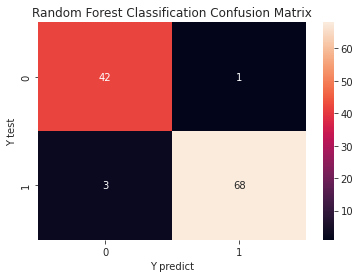

In [56]:
#Confusion Matrix
rfc_cm = confusion_matrix(Y_test, rfcPredict)
sns.heatmap(rfc_cm, annot = True)
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

K-NEAREST NEIGHBOR CLASSIFICATION

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
knnScore = knn.score(X_test, Y_test)
print("K-Nearest Neighbor Classification Accuracy Score:",knnScore)


K-Nearest Neighbor Classification Accuracy Score: 0.9385964912280702


In [58]:
knnPredict = knn.predict(X_test)

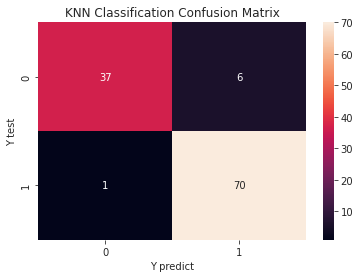

In [60]:
#Confusion Matrix
knn_cm = confusion_matrix(Y_test, knnPredict)
sns.heatmap(knn_cm, annot = True)
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

SVC

In [62]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, Y_train)
svmScore = svm.score(X_test, Y_test)
print("SVC Accuracy Score:", svmScore)

SVC Accuracy Score: 0.9210526315789473


In [63]:
SVCPredict = svm.predict(X_test)

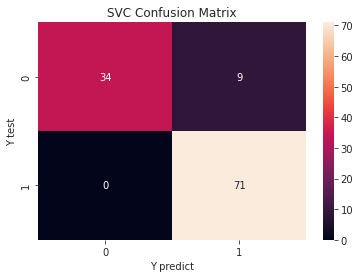

In [65]:
#Confusion Matrix
svm_cm = confusion_matrix(Y_test, SVCPredict)
sns.heatmap(svm_cm, annot = True)
plt.title('SVC Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()